In [38]:
"""
    Assignment 7
        Class: Intro to Data Analysis (CS6850)
        Instructor: Dr. Hamid Karimi
        Date: April 1, 2024
        Student: Paul Semadeni
"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import tree, linear_model

Depth: 1
[0.95714286 0.98910824 0.93737236 0.99931926 0.99455412] Average: 0.9754993678887484
Depth: 5
[0.32789116 0.95507148 0.86861811 0.9884275  0.33219877] Average: 0.6944414035185211
Depth: 10
[0.32789116 0.95371001 0.79646018 0.9632403  0.33219877] Average: 0.6747000828922447
Depth: 50
[0.32653061 0.95371001 0.81552076 0.97004765 0.33219877] Average: 0.6796015615231797
Depth: 100
[0.32789116 0.95371001 0.81415929 0.9884275  0.33219877] Average: 0.6832773463367647


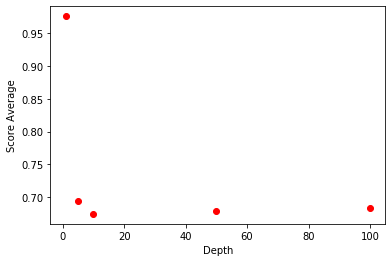

In [36]:
# TODO: (a)	Train the following classifiers (using 5-fold cross-validation) on the train  office.csv file and calculate the average accuracy of the cross-validation for each method given below. Vary the hyperparameters of the classifier and draw a plot that shows the average cross-validation accuracy versus hyperparameter values for each classification method shown below: i.	Decision tree (DT) (maxdepth = 1, 5, 10, 50, 100)
with open("./files/train_office.csv", "r") as file:
    train_office_df = pd.read_csv(file)
depths = [1, 5, 10, 50, 100]

for depth in depths:
    print("Depth:", depth)
    # We are trying to predict if a room is occupied or not
    Y = train_office_df["Occupancy"]
    X = train_office_df.drop("Occupancy", axis=1)
    # Convert date to int
    X["date"] = pd.to_datetime(X["date"]).astype("int64")
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(clf, X, Y, cv=5)
    avg_score = sum(scores)/len(scores)
    print(scores, "Average:", avg_score)
    plt.plot(depth ,avg_score, "ro-")
    plt.xlabel("Depth")
    plt.ylabel("Score Average")


[0.32789116 0.57181756 0.86317223 0.89448604 0.33151804] Average: 0.5977770059691678
[0.3292517  0.57113683 0.86317223 0.89448604 0.33219877] Average: 0.5980491148127052
[0.3292517  0.57181756 0.86317223 0.89448604 0.33219877] Average: 0.5981852618515071
[0.3292517  0.57181756 0.86249149 0.89448604 0.33356025] Average: 0.598321408890309
[0.32789116 0.57181756 0.86317223 0.89516678 0.33287951] Average: 0.5981854470855736
[0.3292517  0.57181756 0.88631722 0.89584752 0.33356025] Average: 0.6033588493259795
[0.3292517  0.57181756 0.89516678 0.89652825 0.33287951] Average: 0.6051287608304043


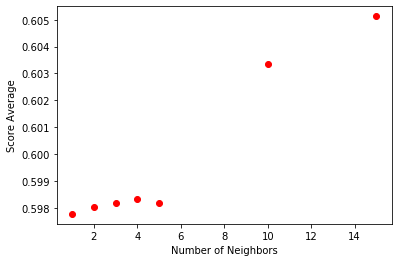

In [40]:
# TODO: ii. K-nearest neighbor (KNN) (k = 1, 2, 3, 4, 5, 10, 15)
num_neighbors = [1, 2, 3, 4, 5, 10, 15]
accuracy = list()

for n in num_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n)
    # clf.fit(X_train, Y_train)
    # Y_pred = clf.predict(X_test)
    # accuracy.append(accuracy_score(Y_test, Y_pred))
    scores = cross_val_score(clf, X, Y, cv=5)
    avg_score = sum(scores)/len(scores)
    print(scores, "Average:", avg_score)
    plt.plot(n ,avg_score, "ro-")
    plt.xlabel("Number of Neighbors")
    plt.ylabel("Score Average")

# plt.plot(num_neighbors, accuracy, 'ro-')
# plt.xlabel("Number of Neighbors")
# plt.ylabel("Test Accuracy")

/Users/paulsemadeni/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paulsemadeni/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

[0.78503401 0.78488768 0.78488768 0.78488768 0.78556841] Average: 0.7850530927142811
[0.78503401 0.78488768 0.78488768 0.78488768 0.78556841] Average: 0.7850530927142811
[0.78503401 0.78488768 0.78488768 0.78488768 0.78556841] Average: 0.7850530927142811
[0.78503401 0.78488768 0.78488768 0.78488768 0.78556841] Average: 0.7850530927142811
[0.78503401 0.78488768 0.78488768 0.78488768 0.78556841] Average: 0.7850530927142811


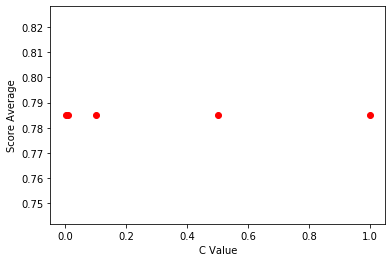

In [43]:
# TODO: iii. Logistic regression (LR) (C = 0.001, 0.01, 0.1, 0.5, 1)
c_values = [0.001, 0.01, 0.1, 0.5, 1]

for c in c_values:
    clf = linear_model.LogisticRegression(C=c)
    # clf.fit(X_train, Y_train)
    # Y_pred = clf.predict(X_test)
    # logistic_accuracy = accuracy_score(Y_test, Y_pred)
    scores = cross_val_score(clf, X, Y, cv=5)
    avg_score = sum(scores)/len(scores)
    print(scores, "Average:", avg_score)
    plt.plot(c ,avg_score, "ro-")
    plt.xlabel("C Value")
    plt.ylabel("Score Average")
